<a href="https://colab.research.google.com/github/AlexanderOnbysh/edu/blob/master/masters/machine-learning/practice-1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to supervised learning 

Let's practice the material we just discussed during the lecture. Please, make a copy of this colaboratory in order to be able to make changes **(File -> Save a copy in Drive)**.


## Homework #1

This colaboratory also contains Homework #1 which is due Feb 20 midnight (23:59 EET time). To complete the homework, extract **(File -> Download .ipynb)** and submit to the course webpage.

## Introducing Colaboratory (Colab)
**Colaboratory**, is a great tool created by Google for individuals interested in getting a hands-on experience with Machine Learning (including Deep Learning). It offers a free CPU/**GPU** quota and a preconfigured virtual machine instance set up for to run Tensorflow and Keras libraries using a Jupyter notebook instance. **In one sentence, it is a perfect “getting started” point for experimentation with neural networks for any part-time hobbist or computer nerd**.

*Introductory text by Oleg Żero (https://zerowithdot.com/colab-workspace/).*


In [1]:
!ls

sample_data


## Classification with KNN on MNIST
We shall use classical MNIST dataset to practice one of the simplest machine learning algorithms - Nearest Neighbour algorithm and its extension - K-Nearest Neighbour algorithm. MNIST stands for Mixed National Institute of Standards and Technology and contains almost 60,000 small square 28×28 pixel grayscale images of digits from 0 to 9. Let's load it!

### Setup: 
Here we will load necessary libraries (NumPy, Pandas and loading and visualising MNIST handwritten digits 

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore', category = RuntimeWarning)

import os

from tensorflow.examples.tutorials.mnist import input_data

In [3]:
mnist = input_data.read_data_sets("MNIST_data/", one_hot=False)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [4]:
!ls

MNIST_data  sample_data


We reshape 28x28 images into vectors of size 784 to decrease the dimensionality of the training data matrix.

In [5]:
images = np.vstack([img.reshape(-1,) for img in mnist.train.images])
labels = mnist.train.labels
print(f"images are of shape: {images.shape} and labels: {labels.shape}")

images are of shape: (55000, 784) and labels: (55000,)


### Visualising MNIST

In [6]:
images[0,:]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

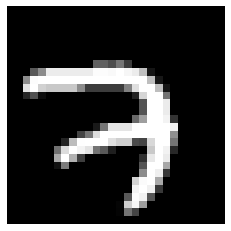

In [7]:
# Let's resize and plot the first image
img_matrix = images[0,:].reshape((28, 28))
plt.imshow(img_matrix, plt.get_cmap('gray'));
plt.axis('off')
plt.show()

What is the label of this image?

In [9]:
print (f"Correct label of the first image is: {labels[0]}")

Correct label of the first image is: 7


### Subsampling

Although, in practice you typically want to use as much data as possible to train your models, large datasets are not very suitable for experimenting and visualization -- it is just too annoying to have to wait minutes for each step to continue. Thus, 60000 examples is a bit too much for our purposes, so why not to sample just 2000.

In [0]:
train_images = images[0:2000,:]
train_labels = labels[0:2000]

test_images = images[2000:3000,:]
test_labels = labels[2000:3000]

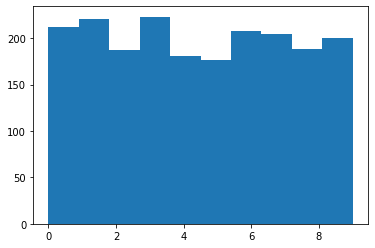

In [13]:
# We should make sure that the distribution is more or less uniform across our samples
plt.hist(train_labels);

Let's see some more examples from all classes.

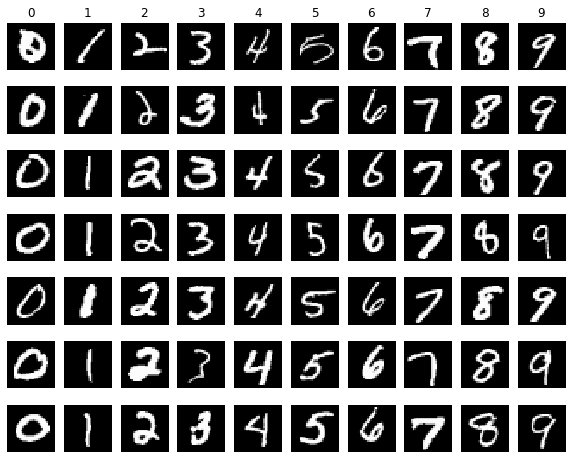

In [14]:
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
# "Names" of classes:
classes =  ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

num_classes = len(classes)
samples_per_class = 7 # Number of images from each class we want to see
for y, cls in enumerate(classes):
    idxs = np.flatnonzero(train_labels == y)
    idxs = np.random.choice(idxs, samples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1
        plt.subplot(samples_per_class, num_classes, plt_idx)
        plt.imshow(train_images[idx].reshape((28, 28)), plt.get_cmap('gray'))
        plt.axis('off')
        if i == 0:
            plt.title(cls)
plt.show()

**Classroom exercise**: Let's define a distance function, let it be Eucledian distance (L2)

In [0]:
def dist(img1, img2):
  ##### YOUR CODE STARTS #####
  return np.linalg.norm(img1-img2, 2)
  ##### YOUR CODE ENDS ##### (please do not delete this line)

Check the validity of the function here:

In [28]:
print(f"Distance between first two images is {dist(train_images[0], train_images[1])} and should be about 11.858")

Distance between first two images is 11.85839557647705 and should be about 11.858


You can play with the defined function below. Check that the distance between images of the same digit is typically smaller than the distance between images of different digits.

In [29]:
print(f"Distance between image with a class {train_labels[1]} and class {train_labels[3]} is {dist(train_images[1], train_images[3])}")
print(f"Distance between image with a class {train_labels[1]} and class {train_labels[11]} is {dist(train_images[1], train_images[11])}")

Distance between image with a class 3 and class 6 is 10.87264633178711
Distance between image with a class 3 and class 3 is 8.07426929473877


Now the actual algorithm. It consists of three steps.

1. Compute distances to all points in the dataset
2. Find the closest point, and 
3. Report the corresponding label.

**Classroom exercise**: Implement the three steps.

We shall do it gently. First we pick a sample image that we will be classifying. Let us say that the first image from the `test_images` is an unknown image sent by our friend:

In [0]:
test_image = test_images[0]
test_label = test_labels[0]

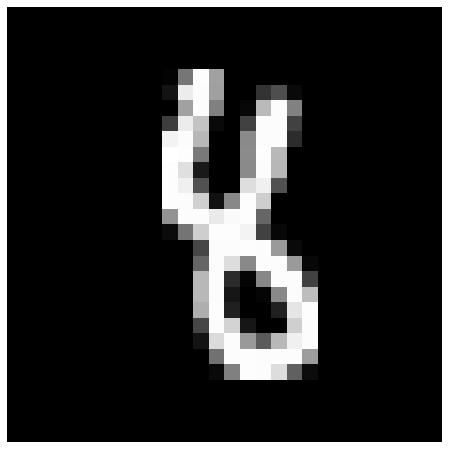

In [31]:
img_matrix = test_image.reshape((28, 28))
plt.imshow(img_matrix, plt.get_cmap('gray'));
plt.axis('off')
plt.show()

**Classroom exercise:** compute all distances from the `test_image` to the `train_images` in the dataset

In [35]:
##### YOUR CODE STARTS #####
all_distances = [dist(test_image, image) for image in train_images]
##### YOUR CODE ENDS ##### (please do not delete this line)
all_distances[0:5]

[10.115574, 9.505396, 9.084774, 9.745117, 8.398525]

Now let's find out which image is closest to our `test_image`

In [0]:
i = np.argmin(all_distances)

Almost done, now report a label with index `i` in `train_labels`

In [0]:
predicted_label = train_labels[i]

Compare it to the true label of the first image in the `train_labels`

In [38]:
print(f"Predicted class for the first image is {predicted_label} and the true label is {test_label}")

Predicted class for the first image is 8 and the true label is 8


Here we can visualise the nearest in terms of the Eucledian distance image from the `train_images`

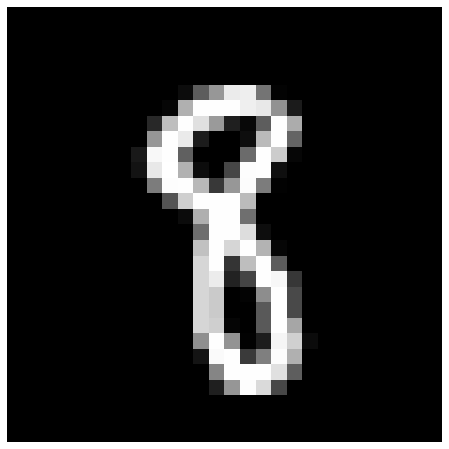

In [39]:
img_matrix = train_images[i,:].reshape((28, 28))
plt.imshow(img_matrix, plt.get_cmap('gray'));
plt.axis('off')
plt.show()

**Classroom exercise:** Now we should make a function out of the code we have already written. 

In [0]:
def classify(image):
  ##### YOUR CODE STARTS #####
  all_distances = [dist(test_image, x) for x in train_images]
  prediction =  train_labels[np.argmin(all_distances)]
  ##### YOUR CODE ENDS ##### (please do not delete this line)
  return prediction

Let's test this function to verify that it works

In [41]:
print(f"Predicted class for the first image is {classify(test_image)} and the true label is {test_label}")

Predicted class for the first image is 8 and the true label is 8


One very popular variation of Nearest Neighbour is K-nearest neighbour. In this algorithm a label for a new instance is chosen by majority vote by **`k`** of its nearest neighbors. 

The actual algorithm is not very different from vanila nearest neighbour:

1. Compute distances to all points in the dataset
2. Find the **`k`** closest points (you may consider using `np.argsort` function)
3. Report the most popular label from these **`k`**. (maybe `np.bincount` can help)

## Homework exercise 1 (3 points): KNN

<font color='red'>**(a)** Implement the aformentioned algorithm in the cell below (2 points)</font>

In [0]:
from collections import Counter

def classify_knn(image, k):
  ##### YOUR CODE STARTS #####
  all_distances = [dist(image, x) for x in train_images]
  indexies = np.argsort(all_distances)[:k]
  labels = train_labels[indexies]
  # print(labels)
  counted = Counter(labels)
  prediction = counted.most_common(1)[0][0]

  ##### YOUR CODE ENDS ##### (please do not delete this line)
  return prediction

Test the function on `test_image`:

In [65]:
print(f"Predicted class for the first image is {classify_knn(test_image, 10)} and the true label is {test_label}")

Predicted class for the first image is 8 and the true label is 8


<font color='red'>**(b)** Modify the function `classify_knn` adding a print statement that outputs labels of K nearest labels. Report 10 nearest neighbours  for the `test_image`. Explain its output in the cell below. (1 point) </font>

Answer to (b): `[8 8 8 8 5 4 8 8 8 5]`

Seems like Nearest Neighbor works, indeed! Apply it to all 1000 test images and then estimate it's effectivness.

**Classroom exercise:** Classify all test images and store them into a separate variable `test_predicted`, choose `k` = 10. **NB, don't forget to uncomment all print statements inside the function!**

In [0]:
test_predicted = [classify_knn(x, 10) for x in test_images]

How many instances from the test set the classifier has predicted correctly?

In [67]:
n_correct = np.sum(test_predicted == test_labels)
print(f"Number of correctly predicted images is {n_correct}")

Number of correctly predicted images is 871


Now we will use **`accuracy`** (namely, proportion of correctly guessed classes) to estimate the performance of our nearest neighbor classifier. For that we need to divide number of correctly predicted images by total number of images.

In [68]:
nn_accuracy = n_correct/len(test_labels)
print(f"Final accuracy of our nearest neighbor classifier is {nn_accuracy}. Not bad!")

Final accuracy of our nearest neighbor classifier is 0.871. Not bad!


Let's examine some of the missclassified examples.


This image with 4 was incorrectly predicted as 9


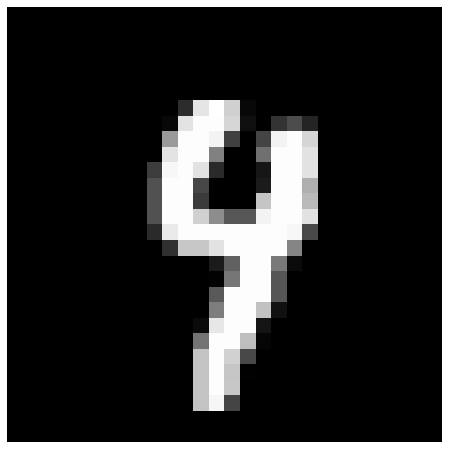

In [69]:
missclassified = np.where(test_predicted != test_labels)[0]

# Set an index of missclassified instance you want to examine
index = 1

# Plot this instance as usual
img_matrix = test_images[missclassified[index]].reshape((28, 28))
plt.imshow(img_matrix, plt.get_cmap('gray'))
plt.axis('off')
print(f"This image with {test_labels[missclassified[index]]} was incorrectly predicted as {test_predicted[missclassified[index]]}")

## Homework exercise 2 (3 points): exploring misclassified examples
<font color='red'>**(a)** Modify the visualisation code that we used to visualise a grid of example images from different classes. Instead of random examples for each class, visualise misclassified examples from each class. For example, in the first column visualise images that had true label `0` but were classified as something else, in the second column, show examples of images that had label `1` but were misclassified into another class and so on. Add a title to each small image, in the following format `true_label, predicted_label`. (2 points)</font>

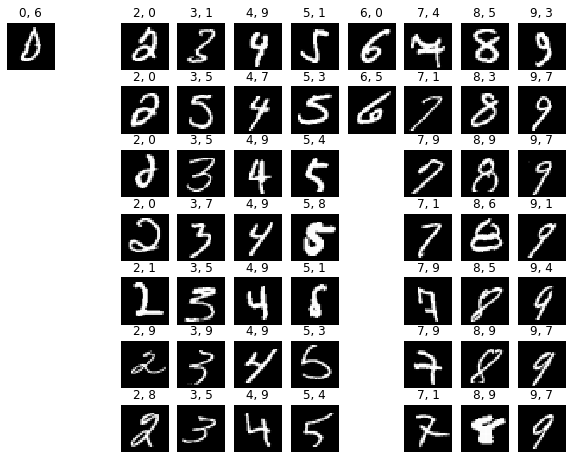

In [101]:
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
# "Names" of classes:
classes =  ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
num_classes = len(classes)
samples_per_class = 7 # Number of images from each class we want to see
for y, cls in enumerate(classes):
    ##### YOUR CODE STARTS #####
    incorrect = np.argwhere(
        (test_predicted != test_labels) & 
        (test_labels == int(cls))
        )
    idxs = incorrect[:7].flatten()

    for i, idx in enumerate(idxs):
      plt_idx = i * num_classes + y + 1
      plt.subplot(samples_per_class, num_classes, plt_idx)
      plt.title(f'{test_labels[idx]}, {test_predicted[idx]}')
      plt.imshow(test_images[idx].reshape((28, 28)), plt.get_cmap('gray'))
      plt.axis('off')
    ##### YOUR CODE ENDS ##### (please do not delete this line)
plt.show()

<font color='red'>**(b)** What is your take away from this figure? Are all classes equally missclassified? Why? Are there any classes that KNN confuses more often, why? (1 point) </font>

Answer to (b):  
Some classes are misclassified more often than others. E.g., there are no instances of misclassified "1", and few instances of "0" and "6". On the other hand, errors in other examples are more frequent.  
Since we use L2 norm as a metric for KNN some small change in the image doesn't introduce significant change in the metric thus for example "4" in many cases looks like "9" and an only small part of the image distinguish this difference. Contrariwise for "1", "1" is different from other digits and thereby is differentiated easily by KNN.

### Scikit-learn

Now let us use the Scikit-Learn package to train the Nearest Neigbor classifier.

Most of the models that we are going to use are implemented in scikit-learn, for example KNN is available under the name `KNNeiborsClassifier`. All you need to do is to import it from `sklearn` (this a short name for scikit-learn).

In [0]:
import sklearn
from sklearn.neighbors import KNeighborsClassifier

Let's create an instance of the KNN classifier by calling a `KNeighborsClassifier()` function. As an input parameter you can specify `k`. For example 5 nearest neighbour classifier is created like this:

In [0]:
model = KNeighborsClassifier(10)

Most of the scikit-learn models have method `fit` that let you train the classifier given training instances and correct labels:

In [104]:
model.fit(train_images, train_labels)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

**Classroom exercise:** Use trained nearest neighbor classifier (`model`) to predict `test_images` and then calculate the accuracy. How does it compare to the one we obtained in the class?

In [0]:
##### YOUR CODE STARTS #####
n_correct = ...
##### YOUR CODE ENDS ##### (please do not delete this line)
print(f"Number of correctly predicted images is {n_correct}")

# Regression

## Small 2D example

Here we will create a small toy dataset for playing around with some regression algorithms.

In [0]:
import numpy as np 
import pandas as pd

example_data = pd.DataFrame({'distance':[1,2,3,4,5], 'fare_amount':[2,4,5,4,5]})

You can access columns using `.` notation and name of the column, e.g.:

In [0]:
example_data.fare_amount

The following is my attempt to reproduce figures exactly as in lecture slides. Never mind, you will be able to use regular `matplotlib` as before if you like.

In [0]:
# Plotting as in ggplot2
!pip install plotnine
from plotnine import *

In [0]:
fig = (
    ggplot(data = example_data,
          mapping = aes(x = 'distance', y = 'fare_amount')) +
    geom_point(fill = '#36B059', 
               size = 5.0,
               stroke = 2.5,
               colour = '#2BE062',
               shape = 'o') +
    labs(
        title ='',
        x = 'distance',
        y = 'fare amount',
    ) +
    xlim(0, 6) +
    ylim(0, 7) +
    theme_bw() + 
    theme(figure_size = (5, 5),
          axis_line = element_line(size = 0.5, colour = "black"),
          panel_grid_major = element_line(size = 0.05, colour = "black"),
          panel_grid_minor = element_line(size = 0.05, colour = "black"),
          axis_text = element_text(colour ='black'))
)
fig

### Linear regression on a toy example
**Classroom exercise**: find value of **`intercept`**,  using precalculated **`slope`** (`w1`) and the equation of the line (`y = intercept + slope*x`). Remember that in this example `x` is `distance` and `y` is `fare_amount`.

In [0]:
##### YOUR CODE STARTS #####
w1 = ...
intercept = ...
##### YOUR CODE ENDS ##### (please do not delete this line)
print(f"w1 = {w1}; intercept = {intercept}, while the correct values are w1 = 0.6 and intercept = 2.2")

We can now plug in these coefficients to visually examine regression line that we have computed

In [0]:
fig + geom_abline(intercept = intercept, slope = w1, color="black", linetype="dashed", size=1.5)

We can compare our regression line with a regression line computed by Python

In [0]:
fig + geom_abline(intercept = intercept, slope = w1, color="black", linetype="dashed", size=1.5) + geom_smooth(method = 'lm', se = False, colour = 'red')

### Decision tree (DT) algorithm
We will borrow DT algorithm from sklearn package as linear regression. Sklearn has both `DecisionTreeRegressor` and `DecisionTreeClassifier` at its disposal. For now, let's use regressor.

In [0]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor(max_depth = 1)

we use function `fit` to train newly created DT instance on our `example_data`

In [0]:
dtr.fit(np.array(example_data.distance).reshape(-1, 1), example_data.fare_amount)

### Creating a synthetic test set that would cover up the whole space

In [0]:
test_data = pd.concat([pd.DataFrame({'distance': np.repeat(x, 71), 'fare_amount': np.linspace(start=0, stop=7, num=71)}) for x in np.linspace(start=0, stop=6, num=61)])
test_data.head()

In [0]:
test_data['predicted_amount'] = dtr.predict(np.array(test_data.distance).reshape(-1, 1))

In [0]:
fig = (
    ggplot(data = example_data,
          mapping = aes(x = 'distance', y = 'fare_amount')) +
    geom_point(data = test_data, mapping = aes(x = 'distance', y = 'fare_amount', size = 5.0, colour = 'predicted_amount'), shape = 's') +
    geom_point(fill = '#36B059', 
               size = 5.0,
               stroke = 2.5,
               colour = '#2BE062',
               shape = 'o') +
    labs(
        title ='',
        x = 'distance',
        y = 'fare amount',
    ) +
    xlim(0, 6) +
    ylim(0, 7) +
    theme_bw() + 
    theme(figure_size = (5, 5),
          axis_line = element_line(size = 0.5, colour = "black"),
          panel_grid_major = element_line(size = 0.05, colour = "black"),
          panel_grid_minor = element_line(size = 0.05, colour = "black"),
          axis_text = element_text(colour ='black')) + 
    guides(size = False)
)
fig

## Homework exercise 3 (3 points): visualising linear regression

<font color='red'>**(a)** use previously computed coefficients `w1` and `intercept` of the linear regression model to predict the fare amount in the `test_data` (1 point)

In [0]:
##### YOUR CODE STARTS #####
test_data['predicted_amount'] = ...
##### YOUR CODE ENDS ##### (please do not delete this line)

<font color='red'>**(b)** visualise these predictions as well as linear regression line the way we have done it for Decision Tree. Explain the results. (1 point)
</font>

In [0]:
##### YOUR CODE STARTS #####
fig = 
##### YOUR CODE ENDS ##### (please do not delete this line)

<font color='red'>**(c)** Interpret the resulting figure. (1 point)
</font>

## NYC Taxi dataset
Next we will work with real-world dataset collected from taxis operating in New York City

In [0]:
# Code to read csv file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [0]:
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

link = 'https://drive.google.com/file/d/1XBBNQ6wnaz5W-h8qbL-2_4MNchGR8YCI' # The shareable link

In [0]:
downloaded = drive.CreateFile({'id':'1XBBNQ6wnaz5W-h8qbL-2_4MNchGR8YCI'}) 
downloaded.GetContentFile('nyc_data.zip')

In [0]:
# check that nyc_data.zip exists
!ls

In [0]:
# After archive has been downloaded
# unzip it
!unzip nyc_data.zip

# check that train_2M.csv, test.csv, model.pickle and sample_submission.csv exist
!ls

* `train_2M.csv` contains 2 million observations from NYC dataset (6 independent variables and fare_amount that we need to predict).
* `test.csv` contains new observations, for which we have to estimate `fare_amount` based on train data.
* `sample_submission.csv` - a sample submission file in the correct format (columns `key` and `fare_amount`). Every row in this file matches every row in `test.csv`.
* `model.pickel` - file that contains trained model saved as a pickle (we are going to deal with it later)

### Setting up Kaggle

You need to have an account on Kaggle.com

In [0]:
!mkdir .kaggle

In [0]:
import json
token = {"username": "skyfallen", "key": "4f1e6c128a654675f9abb467ade8ca4d"}
with open('/content/.kaggle/kaggle.json', 'w') as file:
    json.dump(token, file)

In [0]:
!cp /content/.kaggle/kaggle.json ~/.kaggle/kaggle.json

In [0]:
!kaggle config set -n path -v{/content}

In [0]:
!chmod 600 ~/.kaggle/kaggle.json

In order to sign up for a NYC Taxi competition you need to accept the rules by cliking on "Late submission" button in the upper right corner: https://www.kaggle.com/c/new-york-city-taxi-fare-prediction

Make a test submission to ensure that the submission mechanism works

In [0]:
!kaggle competitions submit -c new-york-city-taxi-fare-prediction -f sample_submission.csv -m "Sample submission test"

Now you can check `My submissions` tab on the website: https://www.kaggle.com/c/new-york-city-taxi-fare-prediction/submissions

## Read in the NYC data

In [0]:
%%time 

# note that we use only 1M out of 2M records
train =  pd.read_csv('train_2M.csv', parse_dates=["pickup_datetime"], nrows = 1_000_000) # the first row will automatically be interpreted as a header

## Brief Exploratory Data Analysis (EDA)

In [0]:
train.head()

In [0]:
train.dtypes

In [0]:
train.describe()

In [0]:
def add_travel_vector_features(df):
    df['abs_diff_longitude'] = (df.dropoff_longitude - df.pickup_longitude).abs()
    df['abs_diff_latitude'] = (df.dropoff_latitude - df.pickup_latitude).abs()

add_travel_vector_features(train)

In [0]:
train.head()

Read in test set

In [0]:
test_df = pd.read_csv('test.csv')
test_df.dtypes

In [0]:
add_travel_vector_features(test_df)

In [0]:
print(train.isnull().sum())

In [0]:
print(f'Old size: {len(train)}')
train = train.dropna(how = 'any', axis = 'rows')
print(f'New size: {len(train)}')

In [0]:
plot = train.iloc[:2000].plot.scatter('abs_diff_longitude', 'abs_diff_latitude')

In [0]:
print(f'Old size: {len(train)}')
train = train[(train.abs_diff_longitude < 5.0) & (train.abs_diff_latitude < 5.0)]
print(f'New size: {len(train)}')

In [0]:
plot = train.iloc[:2000].plot.scatter('abs_diff_longitude', 'abs_diff_latitude')

### Naive baseline
**Classroom exercise**: what is a reasonable baseline for predicting fare amount (`fare_amount` column in NYC taxi dataset) without knowing anything else?

In [0]:
##### YOUR CODE STARTS #####
baseline_predictions = ...
##### YOUR CODE ENDS ##### (please do not delete this line)

In [0]:
# Write the predictions to a CSV file which we can submit to the competition.
submission = pd.DataFrame(
    {'key': test_df.key, 'fare_amount': baseline_predictions},
    columns = ['key', 'fare_amount'])
submission.to_csv('submission_baseline.csv', index = False)

!ls

**Classroom exercise**: submit `submission_baseline.csv` to kaggle using earlier example, report RMSE that you get

In [0]:
##### YOUR CODE STARTS #####
!kaggle ...
##### YOUR CODE ENDS ##### (please do not delete this line)

### Linear regression on NYC taxi dataset based on one feature (abs_diff_longitude)

**Classroom exercise**: Use earlier example on 2D data to calculate **`slope`** (`w1`) and **`intercept`** based on **`abs_diff_longitude`**


In [0]:
##### YOUR CODE STARTS #####
w1 = ...
intercept = ...
##### YOUR CODE ENDS ##### (please do not delete this line)
print(f"w1 = {round(w1, 8)}; intercept = {round(intercept, 8)}")

Instead of calculating coefficients ourselves, we can use sklearn

In [0]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(train[['abs_diff_longitude']], train[['fare_amount']])

#### Inspecting model object

In [0]:
dir(lr)

In [0]:
# Print learnt weights
print(f'[{round(lr.coef_[0][0], 8)}, {round(lr.intercept_[0], 8)}]')

Using earlier example, let's predict `fare_amount` based on calculated coefficients **`intercept`** and **`w1`** and **`test_df.abs_diff_longitude`**.

In [0]:
predictions_manual = w1*test_df.abs_diff_longitude + intercept

Here is how you can predict `fare_amount` for `test_df` using sklearn object `lr`:

In [0]:
predictions_sklearn = lr.predict(test_df[['abs_diff_longitude']])

In [0]:
submission = pd.DataFrame(
    {'key': test_df.key, 'fare_amount': np.squeeze(predictions_sklearn)},
    columns = ['key', 'fare_amount'])
submission.to_csv('submission_lr_2d.csv', index = False)

!ls 

In [0]:
!kaggle competitions submit -c new-york-city-taxi-fare-prediction -f submission_lr_2d.csv -m "Linear Regression with only abs_diff_longitude as an independent variable"

What RMSE you obtained with this model?

## Save/load model using pickle.

In [0]:
import pickle
import os

pickle_out = open('linear_regression.pickle', 'wb')
pickle.dump(lr, pickle_out)

if os.path.getsize('linear_regression.pickle') > 0:  
    print("file is not empty")

In [0]:
!ls

In [0]:
del lr

Now, if you call `lr` you should get an error:

In [0]:
lr

In [0]:
filename = 'linear_regression.pickle'
with open(filename, 'rb') as file:
  lr = pickle.load(file)

Check that `lr` object has been loaded successfully


In [0]:
lr.get_params

## Homework exercise 4 (2 points): read and explore `model.pickel`

<font color='red'> **(a)** read in `model.pickel` file that you have downloaded from `nyc_data.zip` using `pickle.load()` function. (1 point)

In [0]:
##### YOUR CODE STARTS #####
filename = 
##### YOUR CODE ENDS ##### (please do not delete this line)

<font color='red'> **(b)** next, explore the object using function `dir` and answer the following questions:
* <font color='red'> Which model was saved into this object?  
* <font color='red'> How many coefficients it has and what are their values?
* <font color='red'>Can you find out which features have been used for training?

<font color='red'>(1 point)


Answers: 

### Linear regression based on more than one feature

In [0]:
lr = LinearRegression()
lr.fit(train[['abs_diff_longitude', 'abs_diff_latitude']], train[['fare_amount']])

# Print learnt weights
print(f'[{round(lr.coef_[0][0], 8)}, {round(lr.coef_[0][1], 8)} , {round(lr.intercept_[0], 8)}]')

Predict `fare_amount` for test set and submit predictions to kaggle

In [0]:
# Predict fare_amount on the test set using our model (w) trained on the training set.
test_y_predictions = lr.predict(test_df[['abs_diff_longitude', 'abs_diff_latitude']])

# Write the predictions to a CSV file which we can submit to the competition.
submission = pd.DataFrame(
    {'key': test_df.key, 'fare_amount': np.squeeze(test_y_predictions)},
    columns = ['key', 'fare_amount'])
submission.to_csv('submission_lr_3d.csv', index = False)

!ls 

In [0]:
!kaggle competitions submit -c new-york-city-taxi-fare-prediction -f submission_lr_3d.csv -m "Linear Regression with two predictors on 1M records"

### Decision Tree (DT)

In [0]:
from sklearn.tree import DecisionTreeRegressor
dtr= DecisionTreeRegressor(max_depth = 100)
dtr.fit(train[['abs_diff_longitude', 'abs_diff_latitude']], train[['fare_amount']])

How can we predict the goodness of this model without sending it to the server? (Hint: remember RMSE?)

In [0]:
np.sqrt(np.mean(( train.fare_amount - dtr.predict(train[['abs_diff_longitude', 'abs_diff_latitude']]))**2))

or using built-in function:

In [0]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error( train.fare_amount, dtr.predict(train[['abs_diff_longitude', 'abs_diff_latitude']])))

Very good! What would be our standing in the leaderboard if this RMSE was true?

Let's now submit this mode's predictions to kaggle and compare RMSE scores

In [0]:
test_y_predictions = dtr.predict(test_df[['abs_diff_longitude', 'abs_diff_latitude']])

In [0]:
# Write the predictions to a CSV file which we can submit to the competition.
submission = pd.DataFrame(
    {'key': test_df.key, 'fare_amount': test_y_predictions},
    columns = ['key', 'fare_amount'])
submission.to_csv('submission_dt.csv', index = False)

!kaggle competitions submit -c new-york-city-taxi-fare-prediction -f submission_dt.csv -m "Decision Tree Regressor using 1M records and max_depth = 100"

Let's go back to our **slides**!

### Train, val split for more accurate estimate of our model performance
We will divide our initial `train` into `train_X` (80%) and `val_X`(20%). We shall create separate variables `train_y` and `val_y` that will hold fare_amount for corresponding rows for convenience.

In [0]:
train_X = train[0:int(len(train)*0.8)]
train_y = train.fare_amount[0:int(len(train)*0.8)]

**Classroom exercise**: assign remaining 20% of the data to val_X, val_y

In [0]:
##### YOUR CODE STARTS #####
val_X = ...
val_y = ...
##### YOUR CODE ENDS ##### (please do not delete this line)

In [0]:
print(train_X.shape)
print(train_y.shape)
print(val_X.shape)
print(val_y.shape)

In [0]:
train_X[0:5]

What if your first samples were easier to predict than the later ones?

In [0]:
from sklearn.model_selection import train_test_split
train_X, val_X, train_y, val_y = train_test_split(train, np.array(train['fare_amount']), 
                                                      random_state = 111, 
                                                      test_size = 0.20) # you can also explicitely say how many observations will be in the validation set

In [0]:
print(train_X.shape)
print(train_y.shape)
print(val_X.shape)
print(val_y.shape)

In [0]:
train_X[0:5]

We can train our models on training data and evaluating them on validation set to obtain more realistic estimates of RMSE. Let's see if this works with our decision tree model.

In [0]:
dtr=DecisionTreeRegressor(max_depth = 10) 
dtr.fit(train_X[['abs_diff_longitude', 'abs_diff_latitude']], train_y)

In [0]:
np.sqrt(mean_squared_error(train_y, dtr.predict(train_X[['abs_diff_longitude', 'abs_diff_latitude']])))

In [0]:
np.sqrt(mean_squared_error(val_y, dtr.predict(val_X[['abs_diff_longitude', 'abs_diff_latitude']])))

if you increase the depth of the decision tree (e.g. to 100), you will see that the gap between validation and train RMSE also grows. **What could be the reason?**

Now train a new decision tree instance on the whole dataset (train + validation sets combined) with a reasonable `max_depth`.

In [0]:
dtr=DecisionTreeRegressor(max_depth = 10) 
dtr.fit(train[['abs_diff_longitude', 'abs_diff_latitude']], train[['fare_amount']])

In [0]:
test_y_predictions = dtr.predict(test_df[['abs_diff_longitude', 'abs_diff_latitude']])

# Write the predictions to a CSV file which we can submit to the competition.
submission = pd.DataFrame(
    {'key': test_df.key, 'fare_amount': test_y_predictions},
    columns = ['key', 'fare_amount'])
submission.to_csv('submission_dt.csv', index = False)

!ls

In [0]:
!kaggle competitions submit -c new-york-city-taxi-fare-prediction -f submission_dt.csv -m "Decision Tree Regressor using 1M records and max_depth = 10"

## Homework exercise 5 (4 points): cross-validation algorithm
<font color='red'> We were cheating on our validation data when we hand-picked the number of decision trees in the previous example (as we used validation data multiple times). The honest and better way of finding a good hyperparameter (number of trees) is a **cross-validation algorithm**.

**(a)** Implement the cross-validation algorithm using lecture slides and hints in comments. (3 points) </font>

In [0]:
max_depths = [1, 2, 5, 8, 9, 10, 11, 12, 13, 15, 20]

for param in max_depths:
  print(f'Calculating RMSE for {param} tree(s)...')
  ##### YOUR CODE STARTS #####
  # 4-fold cross validation
  # break training data into 4 equal chunks using np.concatenate and np.repeate functions
  folds_indx =  ...

  # randomly shuffle the indeces
  np.random.shuffle(folds_indx)
  
  # number of folds
  n_folds = 4

  # initialise variable that will hold RMSEs for each fold
  fold_RMSEs = np.zeros(n_folds)
  for fold_indx in np.arange(n_folds):

    # split data into train_X, train_y and val_X, val_y depending on the fold:
    train_X = ...
    train_y = ...
    val_X = ...
    val_y = ...

    # train the decision tree with max_depth = param
    dtr = ...

    # fit the decision tree on training data
    dtr.fit(...)

    # predict validation data
    val_predictions = ...

    # calculate RMSE for this fold
    fold_RMSEs[fold_indx] = ...
    ##### YOUR CODE ENDS ##### (please do not delete this line)

  print(f'Average validation RMSE for {param} of trees is {np.mean(fold_RMSEs)}')

<font color='red'> **(b)** Based on above results train the `DecisionTreeRegressor` on the entire training data with new, more optimal number of trees. Predict the test set and submit the results to Kaggle. Your leaderboard score should be smaller than 4.02083 (1 point) </font>

In [0]:
##### YOUR CODE STARTS #####
...

!kaggle ...
##### YOUR CODE ENDS ##### (please do not delete this line)

# Bonus exercises
*(NB, these are optional exercises!)*

## Bonus exercise 1 (2 bonus points):

<font color='red'> Visualising misclassified examples can help to debug the classification algorithm. But misclassified examples may have different probabilities. In this bonus exercise (optional) try modifying code we have written for the homework exercise 2 so that title now would include probability of a true class and of a wrong class. You would probably need to change the code of `classify_knn` function. </font> 

## Bonus exercise 2 (up to 3 bonus points): the grand challenge
<font color='red'> Try to get into top 300 places on public leaderboard (RMSE < 3.04) using different ML algorithms with different parameters, more features, more data, better preprocessing. Here are some ideas for improvement:
* Use more data (we only took 1M out of 2M, there are 53M more on the website)
* Do more preprocessing (remember negative prices or unrealistic numbers of passengers?)
* Use more/better features (e.g. euclidean distance, or google what is haversine distance)
* Use some other regression algorithm (e.g. look into RandomForestRegressor from sklearn.ensemble)
* Tune parameters of these algorithms
* Try something else!
</font> 

<font color='red'>You should make a small post here with code and elaborate explanations of what you have tried (do it even you did not manage to break into top 300). Number of points would depend on quality of your explanations and the resulting rank.</font> 


In [0]:
# Hint:
R = 6378

def haversine_distance(lon1, lon2, lat1, lat2):
    """
    Calculate the great circle distance between two points
    on the earth (specified in decimal degrees)

    All args must be of equal length.    
    
    source: https://stackoverflow.com/a/29546836

    """
    # Convert latitude and longitude to radians
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])

    # Find the differences
    dlon = lon2 - lon1
    dlat = lat2 - lat1

    # Apply the formula 
    a = np.sin(dlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2.0)**2
    # Calculate the angle (in radians)
    c = 2 * np.arcsin(np.sqrt(a))
    # Convert to kilometers
    km = R * c
    
    return km